# TRANSFORMADA DE FOURIER DISCRETA:

<span style="font-family: 'Verdana'; color: red;"> *Bronquivoide* </span>

### En este notebook se ejemplificará la aplicación de una transformada de Fourier sobre señales analógicas.

# Brevísima introducción:

### Las transformadas de Fourier tienen su fundamento en buscar obtener información sobre un sistema descrito en el dominio de un cierto espacio que no puede verse bajo esos términos, por ello se recurre a una transformada de Fourier que te transforme una cantidad, descrita en ese dominio, a su análogo en el dominio del espacio recíproco correspondiente.

### Por ejemplo, en el contexto de la mecánica cuántica, si tenemos un sistema caracterizado por un vector de estado $|\Psi\rangle$, el cual está representado en una base de posiciones $\{|\vec{r}\rangle\}$, y queremos información de este mismo estado pero representado en una base de momentos  $\{|\vec{p}\rangle\}$, hacemos uso de una tranformada de Fourier (pues el espacio de momentos es el espacio recíproco del espacio de posiciones).

### Por otra parte, el ejemplo más sonado para las transformadas de Fourier, tanto en la enseñanza como en la literatura sobre funciones especiales, transformadas integrales, análisis de Fourier y métodos matemáticos de la física, es precisamente entorno al manejo de señales.

### Dentro del procesamiento de señales lo que queremos es extraer información de una señal en un dominio temporal que podría no estar disponible en esta descripción, por lo que se utilizan las transformadas de Fourier para transformar la señal y que quede descrita en un espacio recíproco, que es el asociado al dominio de frecuencias. Es decir, vamos a convertir una señal $v(t) \leftrightarrow w(\omega)$ mediante una transformada de Fourier sin pérdida de información.

### Recordemos que muchas veces, por ejemplo, dentro de la física, se trabaja con la transformada de Fourier continua (como podría ser en el caso que mencionamos de la relación entre estados $\Psi (\vec{r}) \leftrightarrow \Psi (\vec{p})$), la cual está definida por:

<font size="5"> $g(\omega):=\frac{1}{\sqrt{2\pi}}\int _{-\infty}^{\infty}f(t) e^{i\omega t} dt:=\mathscr{F}\{f(t)\}$ </font>

### Donde $f(t)$ es una señal analógica que se convierte a términos en el espacio de frecuencias. O bien, su inversa:

<font size="5"> $f(t):=\frac{1}{\sqrt{2\pi}}\int _{-\infty}^{\infty}g(\omega) e^{i\omega t} dt:=\mathscr{F}\{g(\omega)\}$ </font>

### En cuanto al procesamiento de señales que requiere una digitalización por computadora, este proceso obliga a reemplazar valores continuos por un conjunto discreto. Es decir, vamos a *cambiar* $\int \rightarrow \sum $, (transformada continua a transformada discreta).

### En la transformada de Fourier discreta se considera un conjunto de $2N$ valores temporales discretos para una señal analógica discretizada:

<font size="5"> $t_k = \frac{k\tau}{2N}$, con $k=0,1,2,...,2N-1$. $\tau$ es el periodo de la señal. </font>

### En cuanto al espacio recíproco:

<font size="5"> $\omega _p =\frac{2\pi p}{\tau}$, con $p=0,1,2,...,2N-1$. </font>

### A los tiempos discretos expresados, construimos la transformada de Fourier discreta:

<font size="5"> $F(\omega _p)=\frac{1}{2N}\sum _{k=0}^{2N-1} f(t_k) e^{i\omega t_k}$ </font>

### Y su inversa, que es:

<font size="5"> $f(t_k)=\frac{1}{2N}\sum _{k=0}^{2N-1}  F(\omega _p)e^{-i\omega t_k}$ </font>

### Nota: La notación puede variar dependiendo la literatura consultada. En este caso se presenta una notación de frecuencia angular [radianes / segundo], pero también puede escribirse en otros términos como de frecuencia de ciclos / segundo = [Hz].

### Implementar la transformada discreta de Fourier (*DFT*) en Python comunmente se hace mediante la función *fft.fft* de la biblioteca *numpy*. Esta función opera con el algoritmo computacional conocido como la *transformada rápida de Fourier*.

# ¿Cómo opera la transformada rápida de Fourier?:

### La transformada rápida de Fourier (*FFT* por sus siglas en inglés) es un método para calcular la transformada discreta de Fourier que reduce considerablemente el tiempo de cálculo con respecto a otros métodos factorizando y reorganizando los términos en la suma. Este algoritmo fue desarrollado dentro de la década de 1960 por J.W. Cooley y J.W. Tukey, expuesto en el artículo: *“An algorithm for the machine calculation of complex Fourier Series,” Mathematics Computation, Vol. 19, 1965, pp 297-301*. 

### Aunque el algoritmo mencionado sí tiene sus fundamentos dentro de la teoría de la complejidad computacional, vamos a limitar la discusión a los fundamentos matemáticos que utiliza (elegante manera del autor para decir que no quiere meterse en temas computacionales tan teóricos que no domina y le da flojera estudiar, ¿no?).

### La transformada rápida de Fourier está basada en la transformada discreta de Fourier compleja. ¿Por qué compleja?: podemos clasificar a las transformadas de Fourier no solo como discretas o continuas, sino como reales y complejas. La DFT real toma valores numéricos reales para representar las señales de entrada y de salida, mientras que la compleja hace  lo mismo pero con valores complejos.

### Tomando como punto de partida las ecuaciones anteriores, vamos a escribir (o más bien reescribir) la DFT compleja para una señal de dominio temporal de $N$ muestras (discretización) como: 

### <font size="5"> $X(k)=\frac{1}{N} \sum _{n=0}^{N-1} x(n)e^{(-i2\pi kn/N)}$ </font> en su forma polar 

### O:

### <font size="5"> $X(k)=\frac{1}{N} \sum _{n=0}^{N-1} x(n)[cos(2\pi kn/N)-isen(2\pi kn/N)]$</font> en su forma rectangular a partir de la relación de Euler, <font size="5"> $e^{i \theta}=cos \theta +isen\theta$ </font>, en donde $k$ son las frecuencias cuantizadas y $n$ las muestras de tiempo cuantizado.

### Esto es, mientras la DFT real convierte una señal de dominio temporal real discretizada $x(n)$ a dos señales de dominio de frecuencia real ($Re\{X(k)\}=\frac{2}{N}\sum _{n=0}^{N-1} x(n)cos(2\pi kn/N)$ y $Im\{X(k)\}=\frac{-2}{N}\sum _{n=0}^{N-1} x(n)sen(2\pi kn/N)$, en donde $x(n)$ es la señal de dominio temporal de $N$ muestras descompuesta en un conjunto de $\frac{N}{2}+1$ ondas sinusoidales y $\frac{N}{2}+1$ ondas cosenoidales ), la DFT compleja toma una secuencia de números complejos para convertir la señal de  un solo arreglo complejo $X(k)$ en el dominio de frecuencia.

# EJERCICIO:

### En este ejercicio vamos a implementar una transformada rápida de Fourier a dos señales sinusoidales (de la forma $x(t)=Asen(2\pi \nu t + \phi)$), una estacionaria $x_1 (t)$ y una no estacionaria $x_2 (t)$, las cuales van a estar descritas analíticamente mediante:

### <font size="5"> $x_1 (t)= 5sen(2\pi 5t)$ </font> y <font size="5"> $x_2 (t)= A(t) sen(2\pi 5t)$ </font>, en donde la amplitud $A$ es variante en el tiempo. Vamos a establecer que incrementa linealmente mediante la sucesión de valores representada con la función de NumPy: 

### *$np.linspace(1,10,N)$*, en donde $N$ es el número de muestras de tiempo cuantizado; pues somo se mencionó anteriormente, la digitalización de una señal requiere una discretización, que ahora estará descrita mediante los términos asociados a la transformada de Fourier discreta compleja.

 
### Sobre las unidades de $x_{1,2} (t)$: Si bien la señal depende de la variable tiempo, $t$, recordemos que los términos trigonométricos seno y coseno son relaciones entre longitudes, por lo que sus argumentos son términos adimensionales. El parámetro $\nu \cdot t$ dentro de las ondas sinusoidales arroja una cantidad adimensional, pues $[t]=segundos$ y $[\nu]=\frac{1}{segundo}=Hz$. Las unidades de $x_{1,2}(t)$ vienen del parámetro de la amplitud, $A_{1,2}$, la cual puede estar en metros si hablamos de, por ejemplo, una onda mecánica; puede ser otro tipo de señal como una corriente eléctrica, cuyas unidades serían en amperes, etc. 

### Dejo a criterio del lector la elección de las unidades de las señales.


In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import style
import scipy

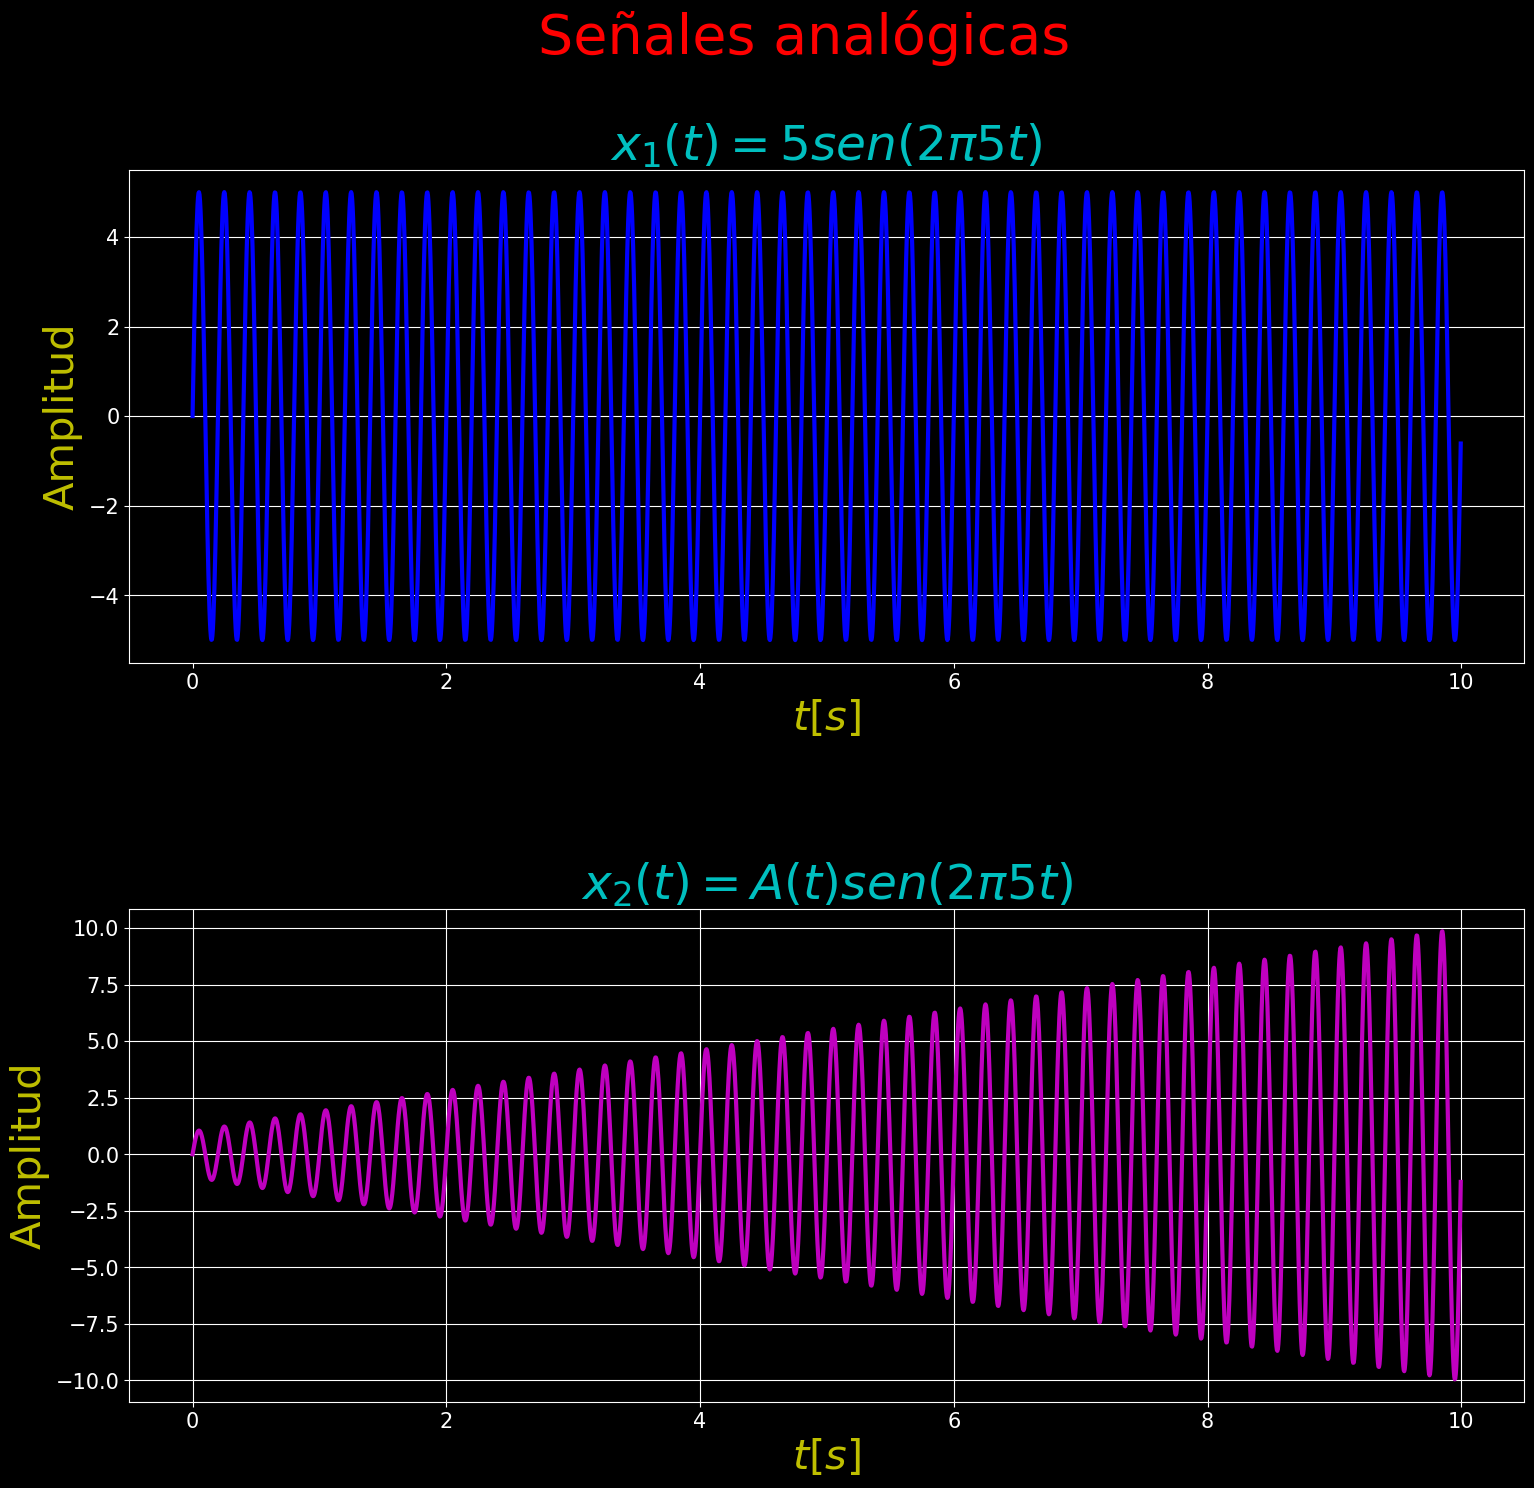

In [54]:
Fs=256 #Frecuencia de muestreo [Hz]
tn=np.arange(0,10,1/Fs) # Arreglo con los datos del tiempo discretizado, 1/Fs=Periodo de muestreo [s]
N=len(tn)  #Número de muestras de tiempo cuantizado
A=np.linspace(1,10,N) # Amplitud linealmente creciente para la señal estacionaria

#Señales:
x1=5*np.sin(2*np.pi*5*tn) # Estacionaria
x2=A*np.sin(2*np.pi*5*tn) # No estacionaria

#Visualización de las señales:
plt.figure(figsize = (18,16)) 
plt.suptitle('Señales analógicas', color="r",fontsize = 40)
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.subplot(2,1,1) 
plt.plot(tn,x1,'b',linewidth = 3) 
plt.title("$x_1 (t)= 5sen(2\pi 5t)$", fontsize = 35, color="c")
plt.xlabel('$t [s]$', fontsize = 30, color="y")
plt.ylabel('Amplitud', fontsize = 30, color="y")
plt.grid(True, axis="y")

plt.subplot(2,1,2) 
plt.plot(tn,x2,'m',linewidth = 3) 
plt.title("$x_2 (t)= A(t) sen(2\pi 5t)$", fontsize = 35, color="c")
plt.xlabel('$t [s]$', fontsize = 30, color="y")
plt.ylabel('Amplitud', fontsize = 30, color="y")
plt.grid(True)

plt.subplots_adjust(hspace=0.5)
plt.show()

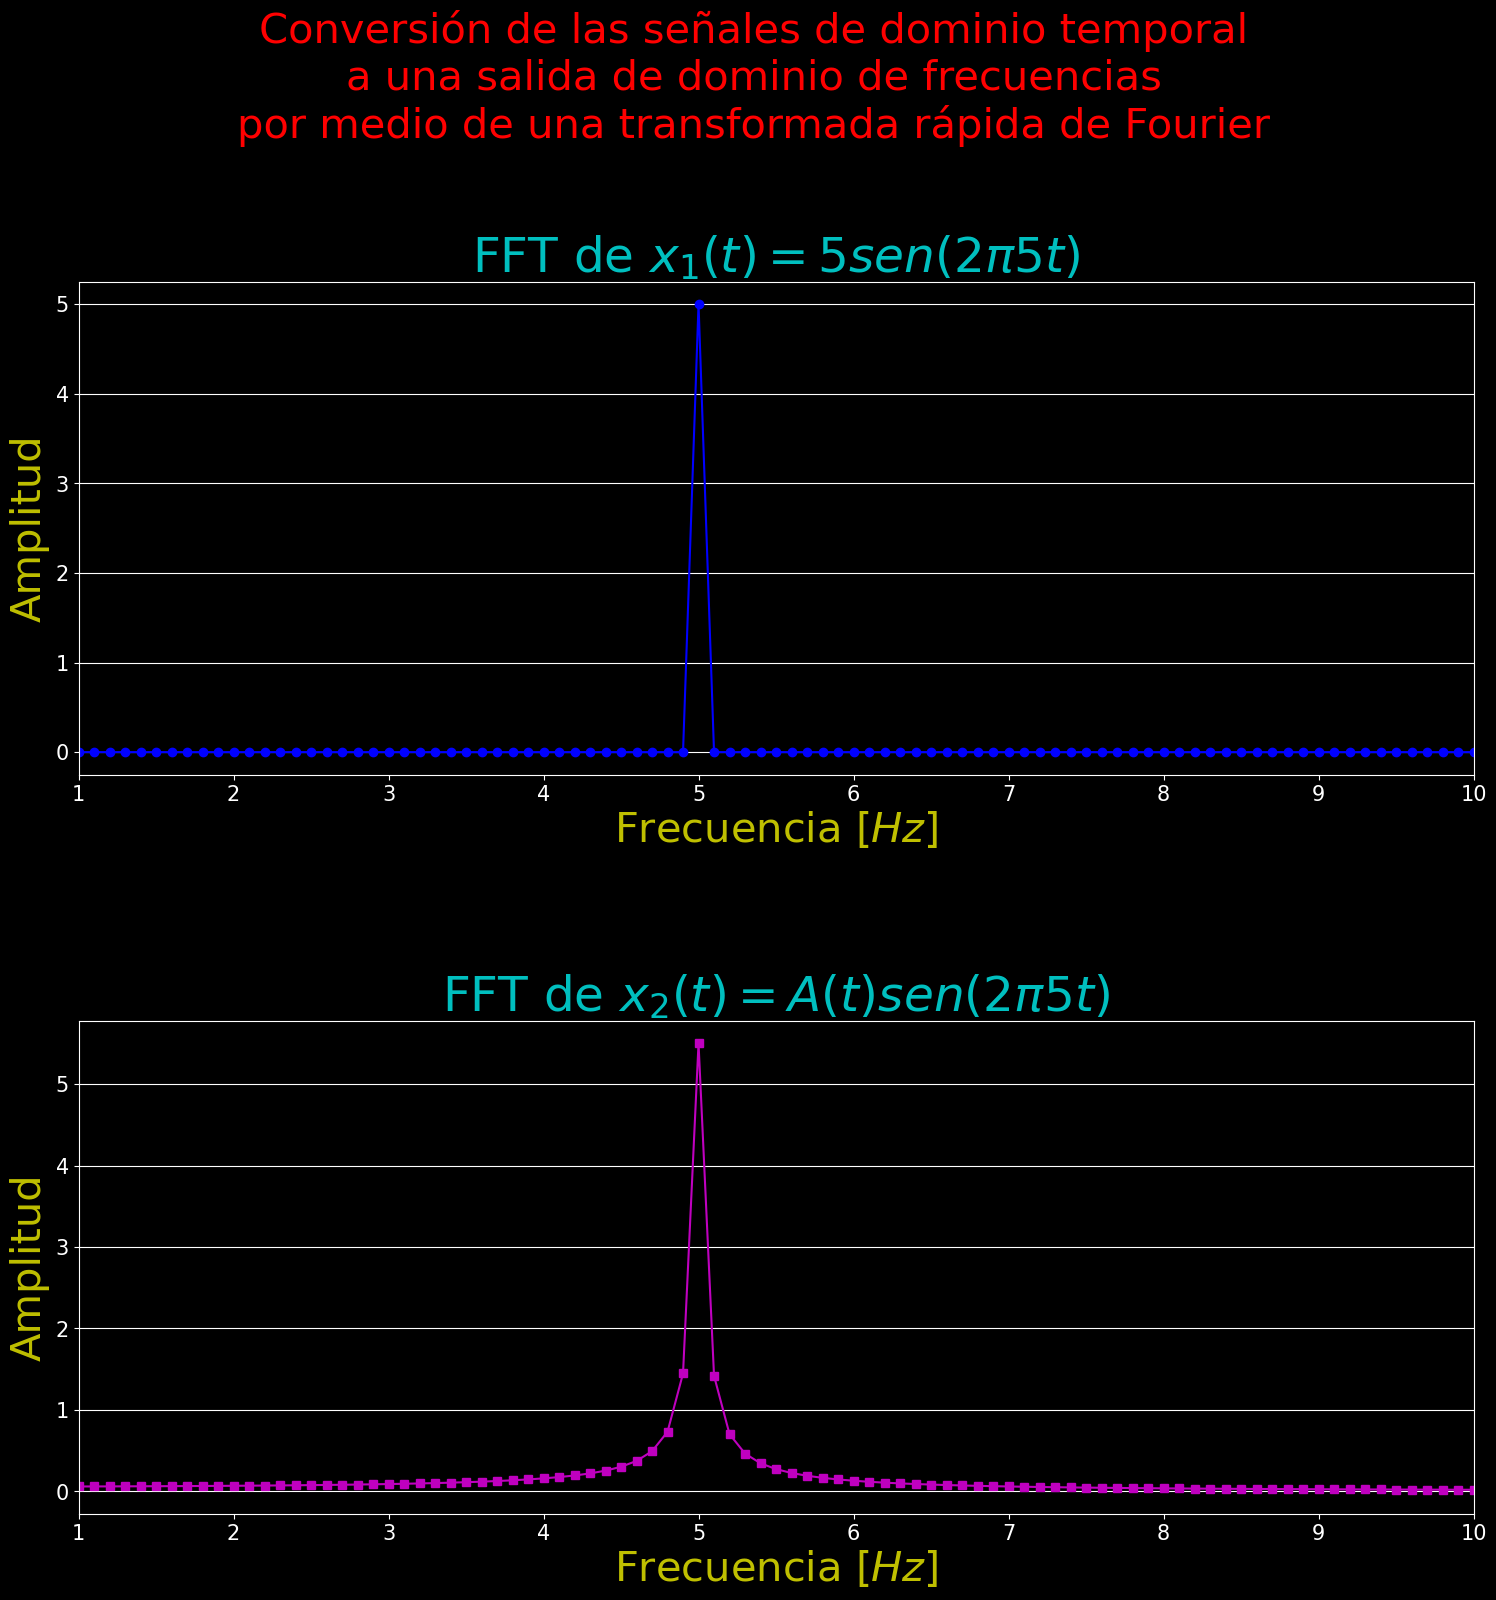

In [61]:
# Transformada rápida de Fourier (FFT) con scipy:
FFT_x1=scipy.fft.fft(x1)
FFT_x2=scipy.fft.fft(x2)

# Normalización de los datos:
X1=2*np.abs((FFT_x1)/len(tn))
X2=2*np.abs((FFT_x2)/len(tn)) #La función np.abs() devuelve el módulo (cantidad real) de las cantidades complejas en la FFT

#Arreglo X(k) que representa al dominio de frecuencias:
Dominio_de_Frecuencia=np.linspace(0,Fs/2,int(np.floor(len(tn)/2)+1)) # Creamos los valores de frecuencia en el eje x para el espectro

#Visualización de la conversión de las señales de dominio temporal a una salida de dominio de frecuencias:
plt.figure(figsize = (18,16)) 
plt.suptitle('Conversión de las señales de dominio temporal\n'
             'a una salida de dominio de frecuencias\n'
             'por medio de una transformada rápida de Fourier', 
             fontsize=30, color="red", y=1.05)
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.subplot(2,1,1) 
plt.plot(Dominio_de_Frecuencia,X1[0:len(Dominio_de_Frecuencia)],'bo-')
plt.xlim([1,10])
plt.title("FFT de $x_1 (t)= 5sen(2\pi 5t)$", fontsize = 35, color="c")
plt.xlabel('Frecuencia $[Hz]$', fontsize = 30, color="y")
plt.ylabel('Amplitud', fontsize = 30, color="y")
plt.grid(True, axis="y")

plt.subplot(2,1,2) 
plt.plot(Dominio_de_Frecuencia,X2[0:len(Dominio_de_Frecuencia)],'ms-')
plt.xlim([1,10])
plt.title('FFT de $x_2 (t)= A(t) sen(2\pi 5t)$', fontsize = 35, color="c")
plt.xlabel('Frecuencia $[Hz]$', fontsize = 30, color="y")
plt.ylabel('Amplitud', fontsize = 30, color="y")
plt.grid(True, axis="y")

plt.subplots_adjust(hspace=0.5)
plt.show()


# Fin del ejercicio.